In [1]:
# Import libraries
library(sp)
library(rgdal)
library(rgeos)

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /home/wojtek/anaconda3/envs/r_env/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.1.1, September 1st, 2020, [PJ_VERSION: 711]
Path to PROJ shared files: /home/wojtek/anaconda3/envs/r_env/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 



In [57]:
# Open file
data_path_zip <- "./data/Panstwo.zip"
unzip(zipfile=data_path_zip, exdir="./data/shp")

data_path_shp <- "./data/shp/Panstwo.shp"
data_shp <- readOGR(dsn=data_path_shp)
# data_shp <- `coordinates<-`(raw_data_shp, c("x","y"))
data_shp = `proj4string<-`(data_shp, CRS("+proj=longlat +ellps=WGS84"))

raw_data_csv <- read.csv("./data/data_csv.csv",
                        header = FALSE,
                        col.names = c("id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude", "timezone", "tz", "dst", "type", "source"),
                        stringsAsFactors=FALSE)
airports =`coordinates<-`(raw_data_csv, c("longitude", "latitude"))

pol_airports = airports[grep("Poland", airports$country),]
proj_pol_airports = `proj4string<-`(pol_airports, CRS("+proj=longlat +ellps=WGS84"))

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum European_Terrestrial_Reference_System_1989 in CRS definition: +proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs”

OGR data source with driver: ESRI Shapefile 
Source: "/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/shp/Panstwo.shp", layer: "Panstwo"
with 1 features
It has 29 fields


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in `proj4string<-`(data_shp, CRS("+proj=longlat +ellps=WGS84")):
“A new CRS was assigned to an object with an existing CRS:
+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs
without reprojecting.
For reprojection, use function spTransform”Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”

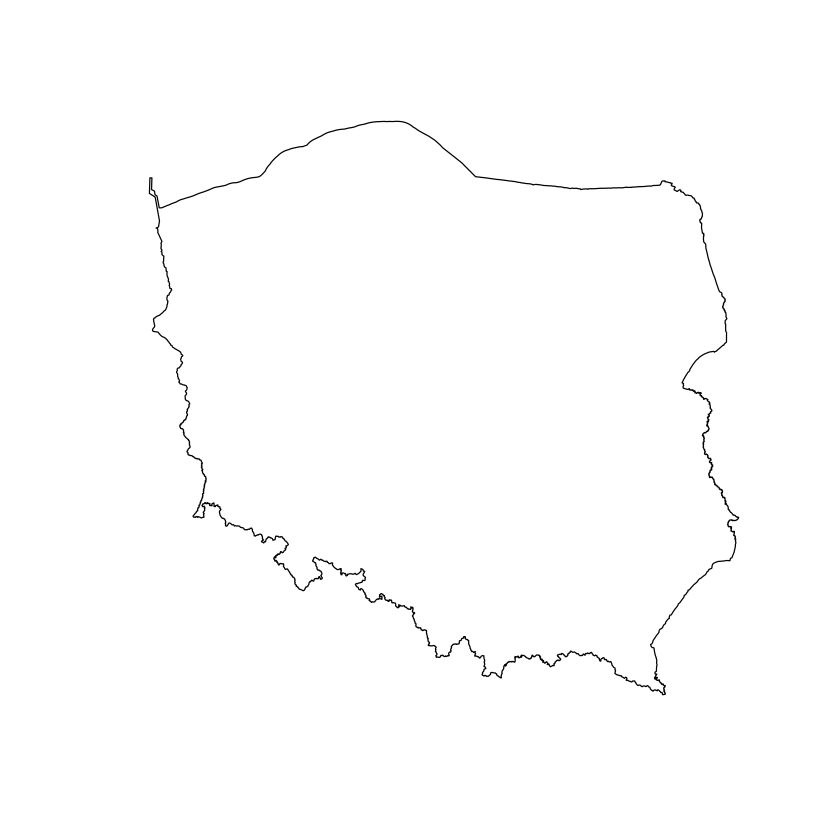

In [58]:
plot(data_shp)

Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”Warning message in proj4string(obj):
“CRS object has comment, which is lost in output”

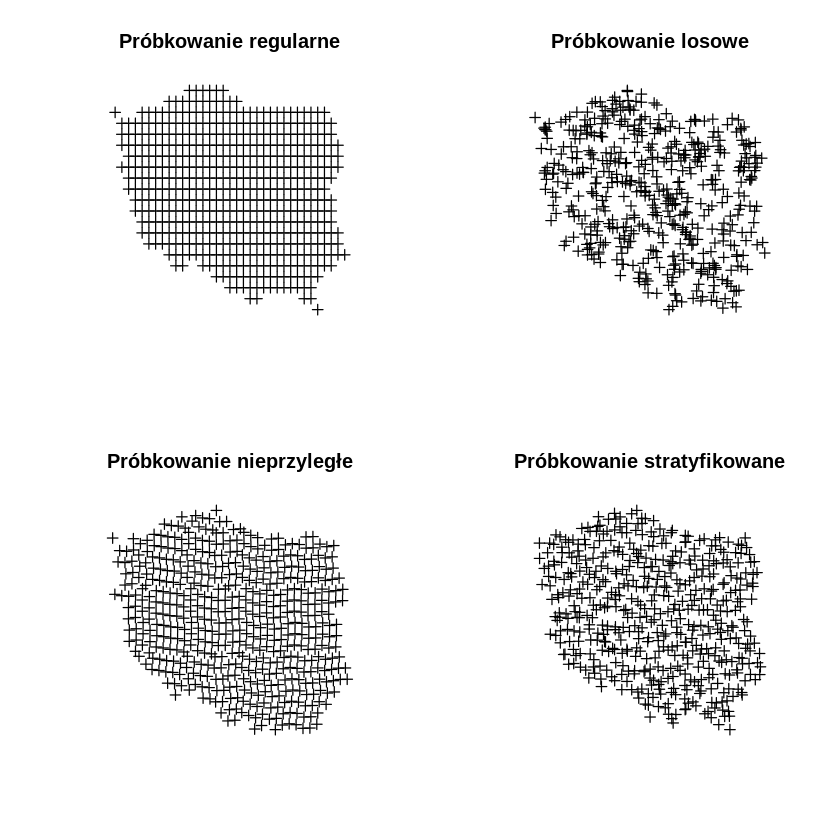

In [71]:
# Sampling
par(mfrow=c(2, 2))

set.seed(225)
regular <- spsample(data_shp, 500, type="regular", pretty=TRUE)
plot(regular, main="Próbkowanie regularne")

set.seed(225)
random <- spsample(data_shp, 500, type="random", pretty=TRUE)
plot(random, main="Próbkowanie losowe")

set.seed(225)
nonaligned <- spsample(data_shp, 500, type="nonaligned", main="Próbkowanie nieprzyległe")
plot(nonaligned, main="Próbkowanie nieprzyległe")

set.seed(225)
stratified <- spsample(data_shp, 500, type="stratified")
plot(stratified, main="Próbkowanie stratyfikowane")

In [60]:
spplot(data_shp, sp.layout=airports["altitude"])

ERROR: Error in stack.SpatialPointsDataFrame(as(data, "SpatialPointsDataFrame"), : all factors should have identical levels


In [91]:
# Open Philadelphia homicides database
path_hom <- "./data/PhillyHomicides/"
philly_hom <- readOGR(dsn=path_hom)

# Open Philadelphia region database
path <- "./data/Philly/"
philly <- readOGR(dsn=path, "PhillyTotalPopHHinc")

OGR data source with driver: ESRI Shapefile 
Source: "/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/PhillyHomicides", layer: "PhillyHomicides"
with 3883 features
It has 8 fields


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum D_unknown in CRS definition: +proj=aea +lat_0=37.5 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs”

OGR data source with driver: ESRI Shapefile 
Source: "/home/wojtek/Documents/Studia/Sem_II/SPDB/testSpSfLibraries/data/Philly", layer: "PhillyTotalPopHHinc"
with 384 features
It has 17 fields


In [95]:
str(philly)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	384 obs. of  17 variables:
  .. ..$ STATEFP10 : Factor w/ 1 level "42": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ COUNTYFP10: Factor w/ 1 level "101": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ TRACTCE10 : Factor w/ 384 levels "000100","000200",..: 347 350 353 329 326 345 46 82 173 15 ...
  .. ..$ GEOID10   : Factor w/ 384 levels "42101000100",..: 347 350 353 329 326 345 46 82 173 15 ...
  .. ..$ NAME10    : Factor w/ 384 levels "1","10.01","10.02",..: 281 284 287 262 259 279 299 354 86 3 ...
  .. ..$ NAMELSAD10: Factor w/ 384 levels "Census Tract 1",..: 281 284 287 262 259 279 299 354 86 3 ...
  .. ..$ MTFCC10   : Factor w/ 1 level "G5020": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ FUNCSTAT10: Factor w/ 1 level "S": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ ALAND10   : num [1:384] 2322732 4501110 1004313 1271533 1016206 ...
  .. ..$ AWATER10  : num [1:384] 66075 8014 1426278 8021 0 ...
  .. ..$ INTPTLAT10: Factor w/ 384 le

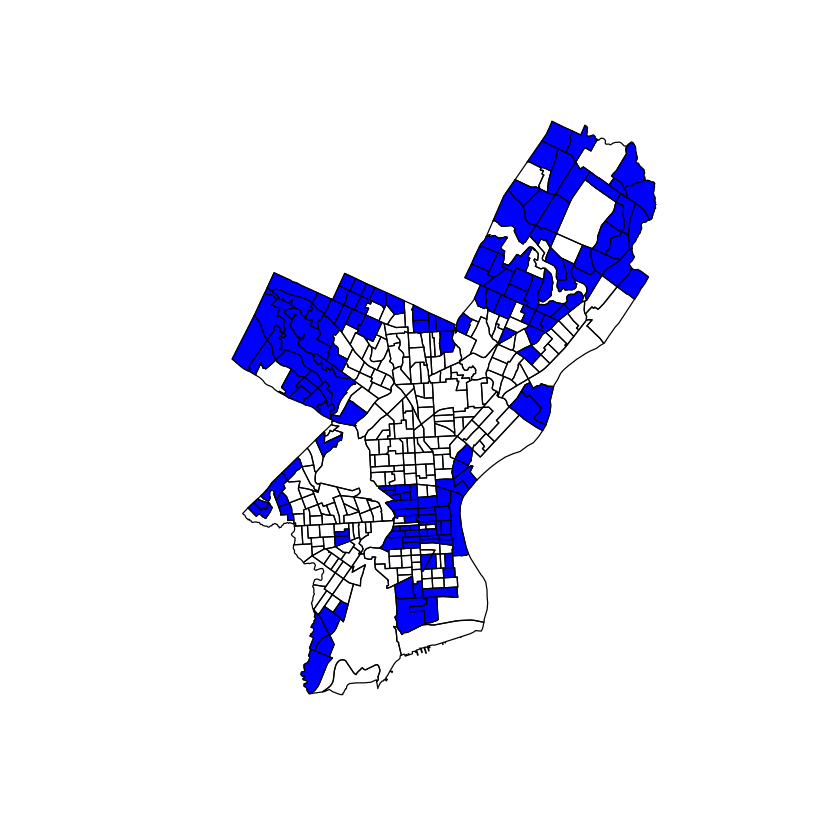

In [109]:
# Subset where household income is more than 40 000$
plot(philly)
philly_40k <- subset(philly, medHHinc > 40000)
plot(philly_40k, add=T, col="blue")

Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints obj

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.I

  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”Warning message in SpatialPointsDataFrame(spp, data.frame(Lines.NR = L3, Lines.ID = L2, :
“If the coords argument is a SpatialPoints object, set its CRS first;
  the proj4string argument to this function is ignored.”

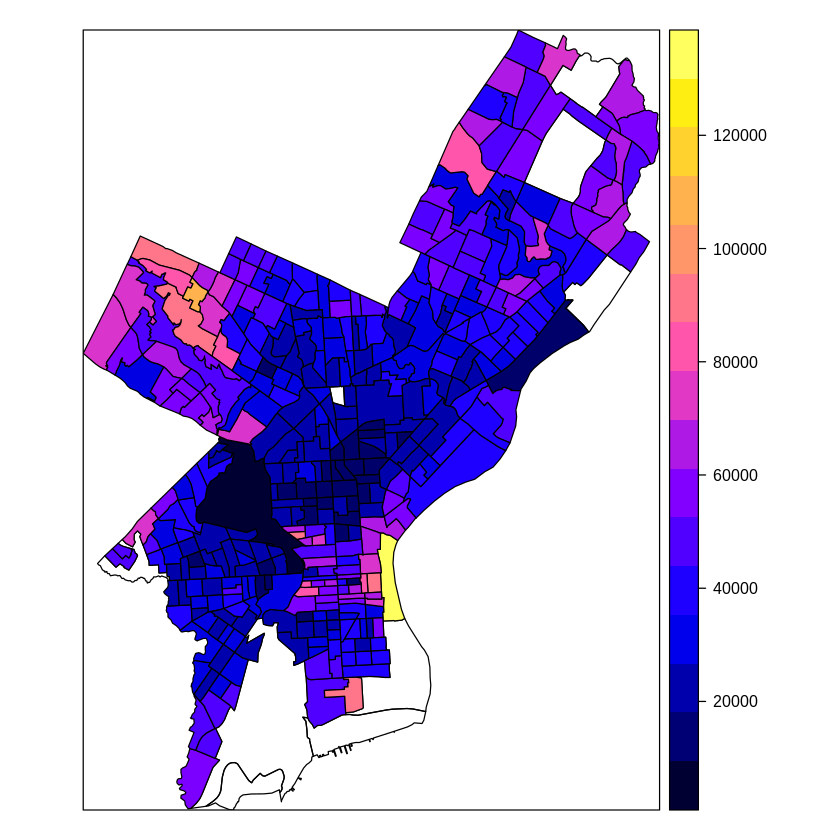

In [111]:
spplot(philly, "medHHinc")